In [19]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
sp.init_printing()
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Sebastian Novoa Ortiz
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

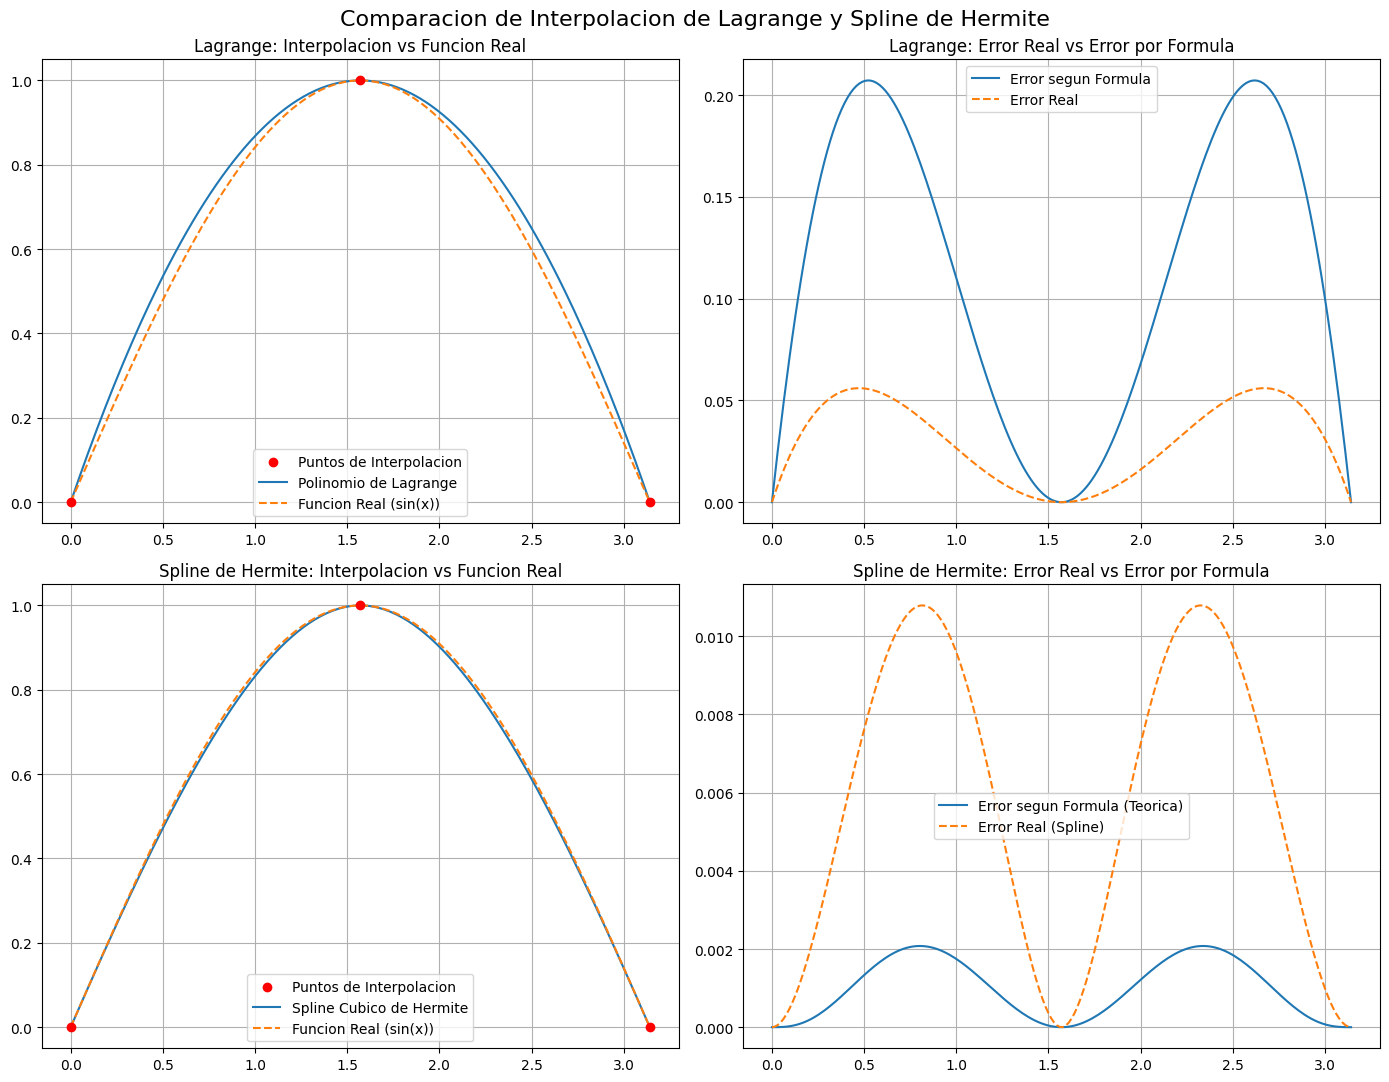

In [26]:
# se definen la funcion principal y sus derivadas usando expresiones lambda
funcion_real = lambda x: np.sin(x)
derivada_1 = lambda x: np.cos(x)
derivada_3 = lambda x: -np.cos(x) # necesaria para la formula de error de Lagrange
derivada_6 = lambda x: -np.sin(x) # necesaria para la formula de error de Hermite (polinomio unico)

# se definen los puntos (nodos) de interpolacion
nodos_x = np.array([0, np.pi/2, np.pi])
valores_y = funcion_real(nodos_x)
valores_dy = derivada_1(nodos_x)
num_puntos = len(nodos_x)

# --- Definicion de las Formulas de Error ---

# formula del error teorico para el polinomio unico de Lagrange
formula_error_lagrange = lambda x: abs(1/factorial(num_puntos) * derivada_3(x) * (x-nodos_x[0])*(x-nodos_x[1])*(x-nodos_x[2]))

# formula del error teorico para el polinomio unico de Hermite
formula_error_hermite = lambda x: abs(derivada_6(x)/factorial(2*num_puntos) * ((x-nodos_x[0])**2 *(x-nodos_x[1])**2 *(x-nodos_x[2])**2))

# funcion para calcular el error real (diferencia absoluta)
error_real_absoluto = lambda y_real, y_aprox: abs(y_real - y_aprox)

# --- Calculo de las Interpolaciones ---

# se crea el polinomio de Lagrange usando la funcion de scipy
polinomio_lagrange = lagrange(nodos_x, valores_y)

# se crea el spline cubico de Hermite usando la funcion de scipy
spline_hermite = CubicHermiteSpline(nodos_x, valores_y, valores_dy)

# --- Evaluacion de Puntos para la Grafica ---

# se crea un conjunto de puntos x mas denso para graficar las curvas
puntos_grafica_x = np.linspace(min(nodos_x), max(nodos_x), 200)

# se evaluan las interpolaciones en los puntos de la grafica
y_grafica_lagrange = polinomio_lagrange(puntos_grafica_x)
y_grafica_hermite = spline_hermite(puntos_grafica_x)

# se calculan los errores para Lagrange
error_formula_lagrange_puntos = formula_error_lagrange(puntos_grafica_x)
error_real_lagrange_puntos = error_real_absoluto(funcion_real(puntos_grafica_x), y_grafica_lagrange)

# se calculan los errores para Hermite
error_formula_hermite_puntos = formula_error_hermite(puntos_grafica_x)
error_real_hermite_puntos = error_real_absoluto(funcion_real(puntos_grafica_x), y_grafica_hermite)

# --- Creacion de las Graficas ---

# se crea una figura con una matriz de 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 11))
fig.suptitle('Comparacion de Interpolacion de Lagrange y Spline de Hermite', fontsize=16)

# --- Fila superior: Graficas de Lagrange ---

# subplot de la interpolacion de Lagrange
ax[0, 0].set_title('Lagrange: Interpolacion vs Funcion Real')
ax[0, 0].scatter(nodos_x, valores_y, color='red', zorder=5, label='Puntos de Interpolacion')
ax[0, 0].plot(puntos_grafica_x, y_grafica_lagrange, label='Polinomio de Lagrange')
ax[0, 0].plot(puntos_grafica_x, funcion_real(puntos_grafica_x), label='Funcion Real (sin(x))', linestyle='--')
ax[0, 0].legend()
ax[0, 0].grid(True)

# subplot del error de Lagrange
ax[0, 1].set_title('Lagrange: Error Real vs Error por Formula')
ax[0, 1].plot(puntos_grafica_x, error_formula_lagrange_puntos, label='Error segun Formula')
ax[0, 1].plot(puntos_grafica_x, error_real_lagrange_puntos, label='Error Real', linestyle='--')
ax[0, 1].legend()
ax[0, 1].grid(True)

# --- Fila inferior: Graficas de Hermite (Spline) ---

# subplot de la interpolacion del Spline de Hermite
ax[1, 0].set_title('Spline de Hermite: Interpolacion vs Funcion Real')
ax[1, 0].scatter(nodos_x, valores_y, color='red', zorder=5, label='Puntos de Interpolacion')
ax[1, 0].plot(puntos_grafica_x, y_grafica_hermite, label='Spline Cubico de Hermite')
ax[1, 0].plot(puntos_grafica_x, funcion_real(puntos_grafica_x), label='Funcion Real (sin(x))', linestyle='--')
ax[1, 0].legend()
ax[1, 0].grid(True)

# subplot del error del Spline de Hermite (comparacion restaurada)
ax[1, 1].set_title('Spline de Hermite: Error Real vs Error por Formula')
ax[1, 1].plot(puntos_grafica_x, error_formula_hermite_puntos, label='Error segun Formula (Teorica)')
ax[1, 1].plot(puntos_grafica_x, error_real_hermite_puntos, label='Error Real (Spline)', linestyle='--')
ax[1, 1].legend()
ax[1, 1].grid(True)

# se ajusta y muestra la figura
plt.tight_layout()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

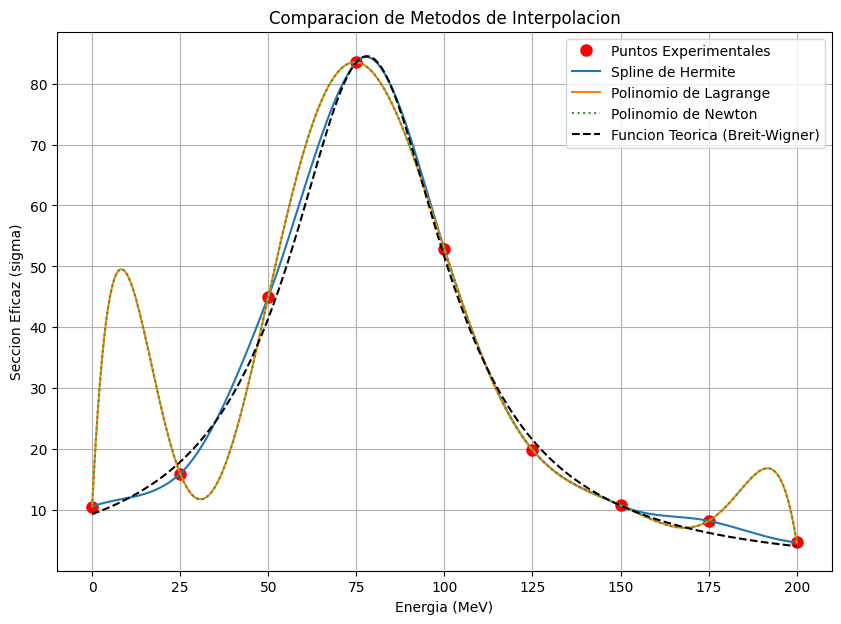

Maximo error del polinomio de Lagrange: 38.2034
Maximo error del polinomio de Newton:   38.2034
Maximo error del spline de Hermite:     3.5898

El mejor metodo de interpolacion para este conjunto de datos es: Hermite


In [27]:
# --- Implementacion del Polinomio de Newton ---
# Estas funciones construyen el polinomio de Newton desde cero.

def diferencias_divididas_recursivo(puntos_x, puntos_y, j, i=0):
    """
    Calcula la diferencia dividida f[x_i, ..., x_j] de forma recursiva.
    NOTA: Este metodo es conceptualmente claro pero computacionalmente ineficiente.
    """
    # caso base: f[x_i] = y_i
    if i == j:
        return puntos_y[i]
    # paso recursivo
    else:
        numerador = (diferencias_divididas_recursivo(puntos_x, puntos_y, j, i=i+1) -
                     diferencias_divididas_recursivo(puntos_x, puntos_y, j-1, i=i))
        denominador = puntos_x[j] - puntos_x[i]
        return numerador / denominador

def calcular_coeficientes_newton(puntos_x, puntos_y):
    """
    Calcula todos los coeficientes a_j = f[x_0, ..., x_j] para el polinomio de Newton.
    """
    # se inicializa un array para guardar los coeficientes
    num_puntos = len(puntos_x)
    coeficientes = np.zeros(num_puntos, dtype=float)

    # se calcula cada coeficiente llamando a la funcion de diferencias divididas
    for j in range(num_puntos):
        coeficientes[j] = diferencias_divididas_recursivo(puntos_x, puntos_y, j)

    return coeficientes

def evaluar_polinomio_newton(puntos_x, puntos_y, x_eval):
    """
    Evalua el polinomio de Newton en un punto o un array de puntos x_eval.
    P(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + ...
    """
    # se obtienen los coeficientes del polinomio
    coeficientes_a = calcular_coeficientes_newton(puntos_x, puntos_y)

    # el primer termino del polinomio es a_0
    polinomio_evaluado = coeficientes_a[0]

    # se anaden los demas terminos de forma iterativa
    termino_producto = 1.0
    for j in range(1, len(puntos_x)):
        # se actualiza el producto: (x-x_0)(x-x_1)...(x-x_{j-1})
        termino_producto *= (x_eval - puntos_x[j-1])
        # se anade el termino a_j * producto al polinomio
        polinomio_evaluado += coeficientes_a[j] * termino_producto

    return polinomio_evaluado

# --- Configuracion de Constantes y Datos ---

# constantes fisicas del problema
energia_resonancia_Er = 78
ancho_gamma = 55

# datos experimentales (puntos a interpolar)
puntos_energia = np.array([0  , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
puntos_sigma = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# --- Definicion de la Funcion Teorica (Breit-Wigner) ---

# para definir la funcion teorica, primero se calcula la constante sigma_0
# se despeja de la ecuacion y se reemplaza con un par de datos experimentales, ej: (E, sigma) = (75, 83.5)
sigma_cero = 83.5 * ((75 - energia_resonancia_Er)**2 + (ancho_gamma/2)**2)

# se define la funcion teorica de Breit-Wigner usando la constante calculada
funcion_teorica = lambda E: sigma_cero / ((E - energia_resonancia_Er)**2 + (ancho_gamma/2)**2)

# se define su derivada, necesaria para la interpolacion de Hermite
derivada_funcion_teorica = lambda E: -2 * sigma_cero * (E - energia_resonancia_Er) / (((E - energia_resonancia_Er)**2 + (ancho_gamma/2)**2)**2)

# se evalua la derivada en los puntos de energia para obtener los valores y'
valores_derivada_sigma = derivada_funcion_teorica(puntos_energia)


# --- Calculo de las Interpolaciones ---

# se crea el polinomio de interpolacion de Lagrange usando la funcion de scipy
polinomio_lagrange = lagrange(puntos_energia, puntos_sigma)

# se crea el spline cubico de Hermite, que interpola valor y derivada en cada punto
spline_hermite = CubicHermiteSpline(puntos_energia, puntos_sigma, valores_derivada_sigma)

# se genera un conjunto de puntos mas denso para graficar las curvas suavemente
x_grafica = np.linspace(min(puntos_energia), max(puntos_energia), 400)

# se evalua el polinomio de Newton en los puntos de la grafica.
valores_newton_grafica = evaluar_polinomio_newton(puntos_energia, puntos_sigma, x_grafica)


# --- Grafica Comparativa de las Interpolaciones ---

plt.figure(figsize=(10, 7))
# se grafican los puntos experimentales originales
plt.plot(puntos_energia, puntos_sigma, 'o', color='red', markersize=8, label='Puntos Experimentales')
# se grafican las curvas de cada metodo de interpolacion
plt.plot(x_grafica, spline_hermite(x_grafica), label='Spline de Hermite')
plt.plot(x_grafica, polinomio_lagrange(x_grafica), label='Polinomio de Lagrange')
plt.plot(x_grafica, valores_newton_grafica, label='Polinomio de Newton', linestyle=':')
# se grafica la funcion teorica original para comparar
plt.plot(x_grafica, funcion_teorica(x_grafica), '--', color='black', label='Funcion Teorica (Breit-Wigner)')

plt.title('Comparacion de Metodos de Interpolacion')
plt.xlabel('Energia (MeV)')
plt.ylabel('Seccion Eficaz (sigma)')
plt.legend()
plt.grid(True)
plt.show()

# --- Calculo del Error Maximo ---

# se define una funcion para calcular el error maximo entre la funcion teorica y una interpolacion
def calcular_error_maximo(funcion_real, polinomio_callable, puntos_x):
    # se calcula la diferencia absoluta en cada punto y se retorna el maximo
    error = np.abs(polinomio_callable(puntos_x) - funcion_real(puntos_x))
    return np.max(error)

# se calculan los errores para Lagrange y Hermite
error_max_lagrange = calcular_error_maximo(funcion_teorica, polinomio_lagrange, x_grafica)
error_max_hermite = calcular_error_maximo(funcion_teorica, spline_hermite, x_grafica)
error_max_newton = np.max(np.abs(valores_newton_grafica - funcion_teorica(x_grafica)))

print(f'Maximo error del polinomio de Lagrange: {error_max_lagrange:.4f}')
print(f'Maximo error del polinomio de Newton:   {error_max_newton:.4f}')
print(f'Maximo error del spline de Hermite:     {error_max_hermite:.4f}')

# se determina cual es el mejor metodo (el que tiene menor error maximo)
errores = {
    'Lagrange': error_max_lagrange,
    'Newton': error_max_newton,
    'Hermite': error_max_hermite
}
mejor_metodo = min(errores, key=errores.get)
print(f'\nEl mejor metodo de interpolacion para este conjunto de datos es: {mejor_metodo}')


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

--- 1. Graficando Polinomios de Lagrange y su Error para cada n ---


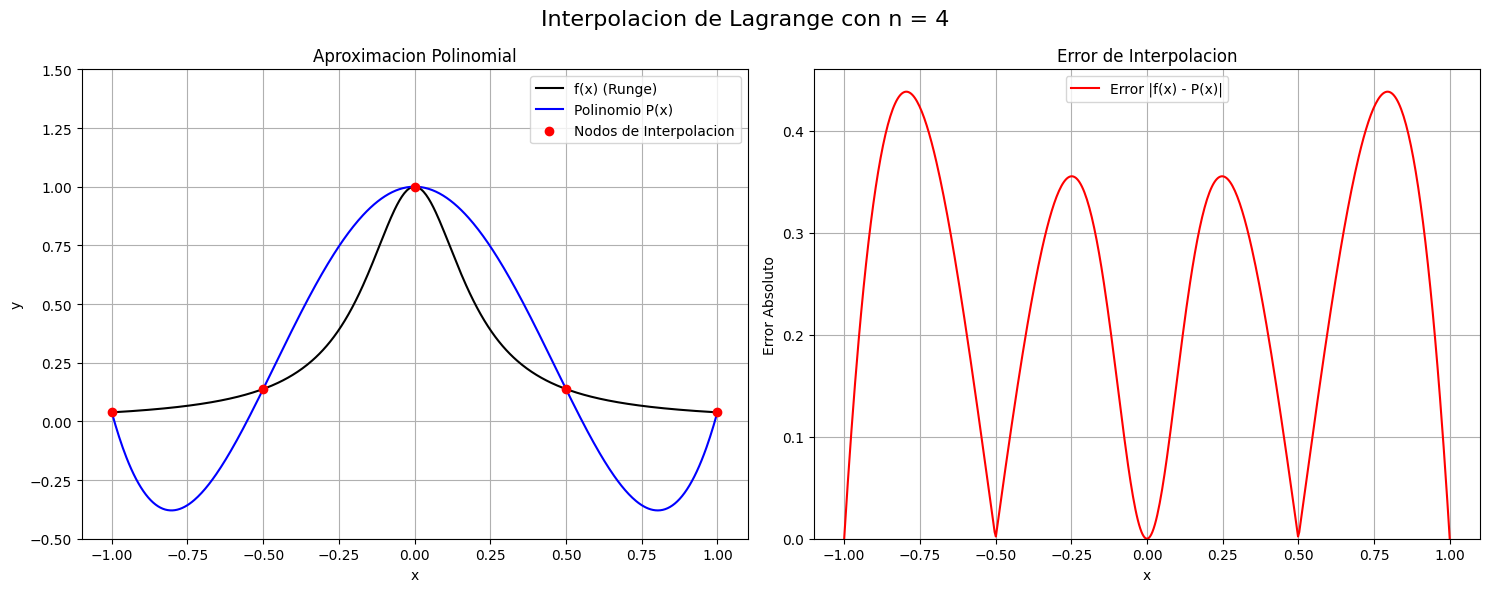

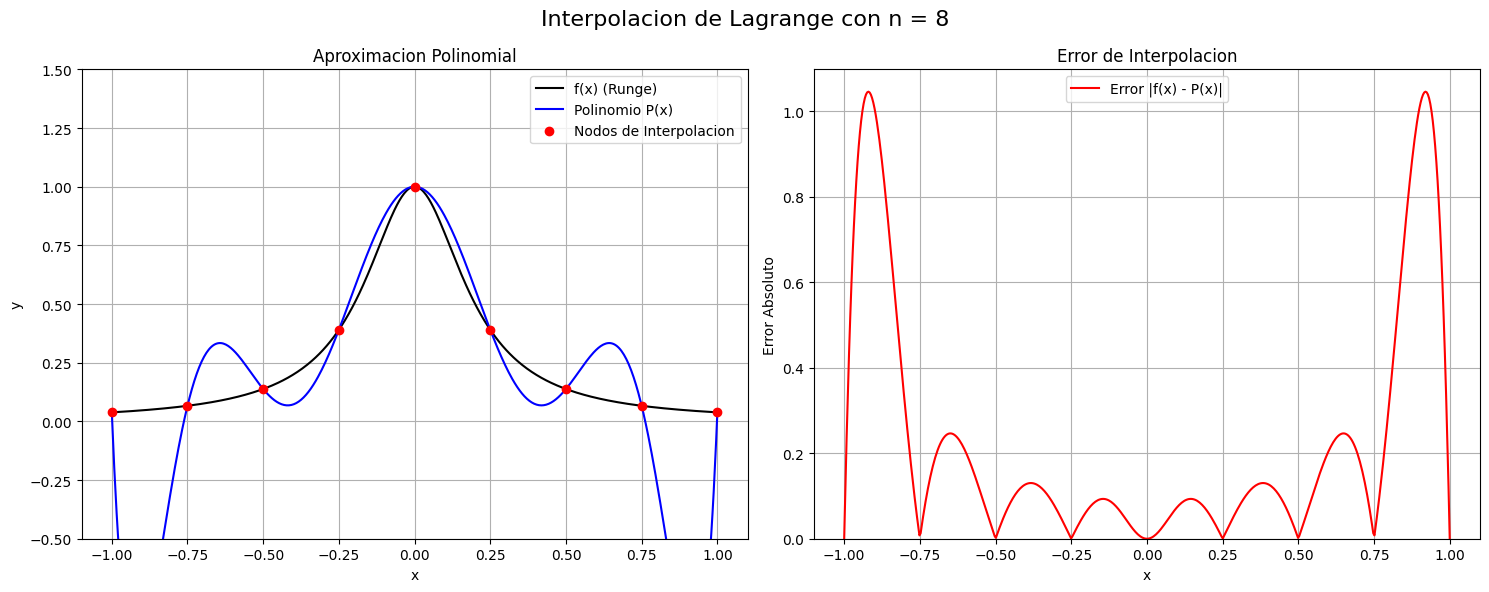

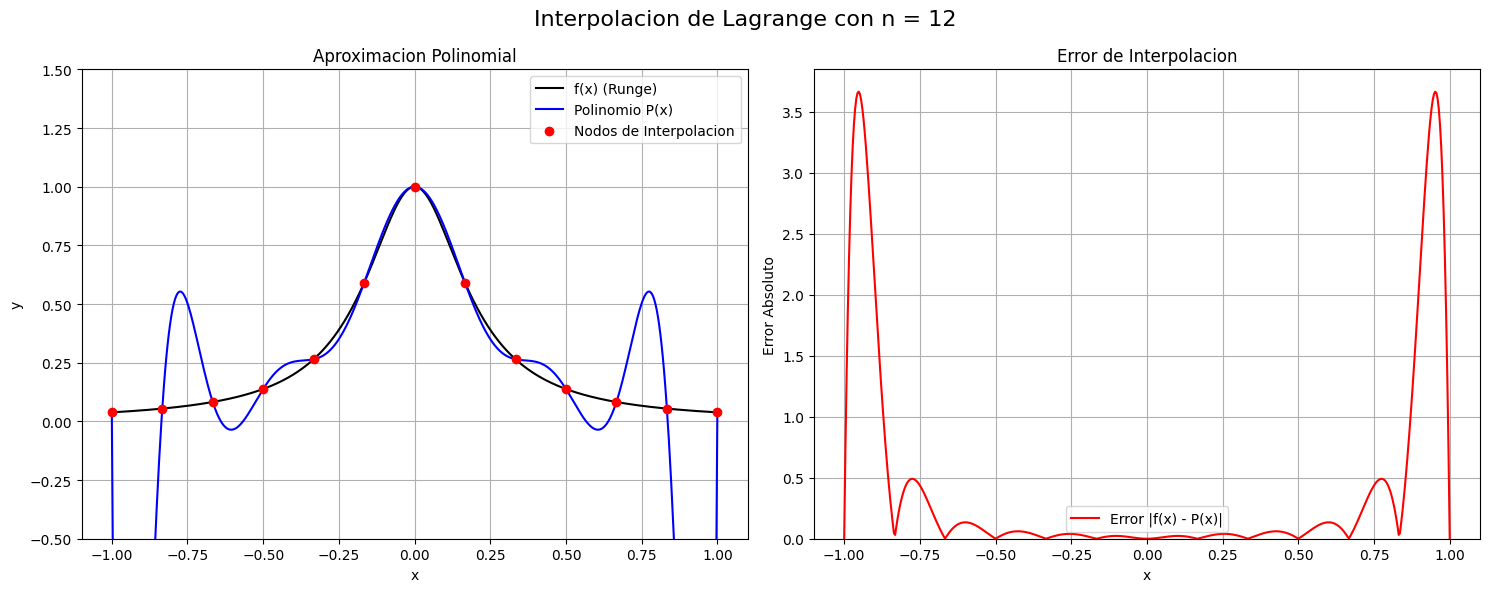

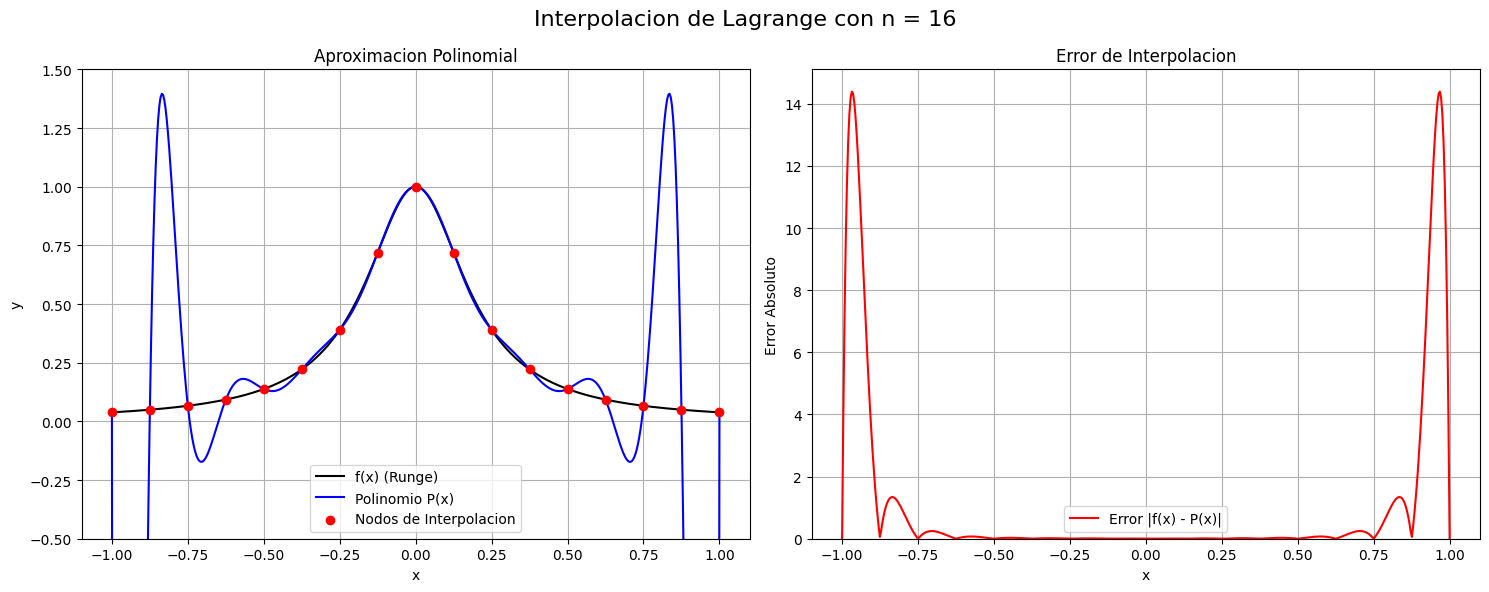

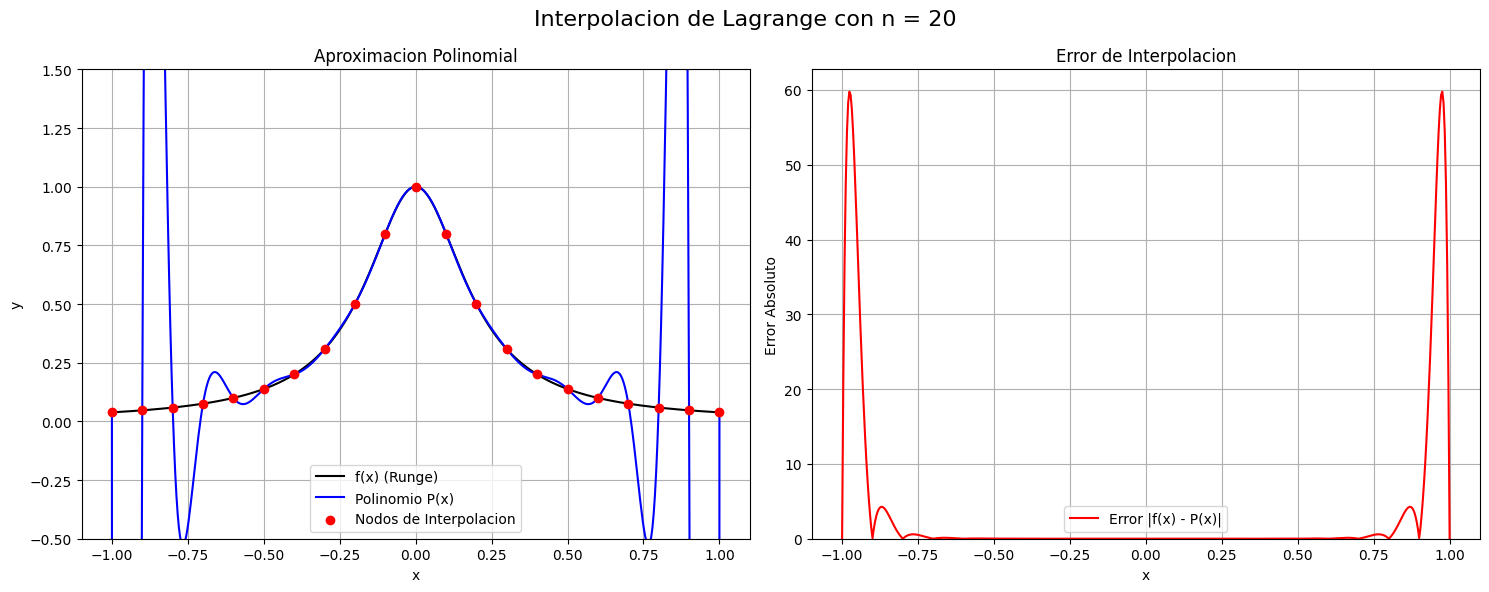


--- 2. Estimando la Cota de Error para Lagrange (n=4 en x=0.5) ---
La cota de error estimada en x=0.5 para n=4 es: 0.000000

--- 3. Graficando Splines Cubicos de Hermite ---


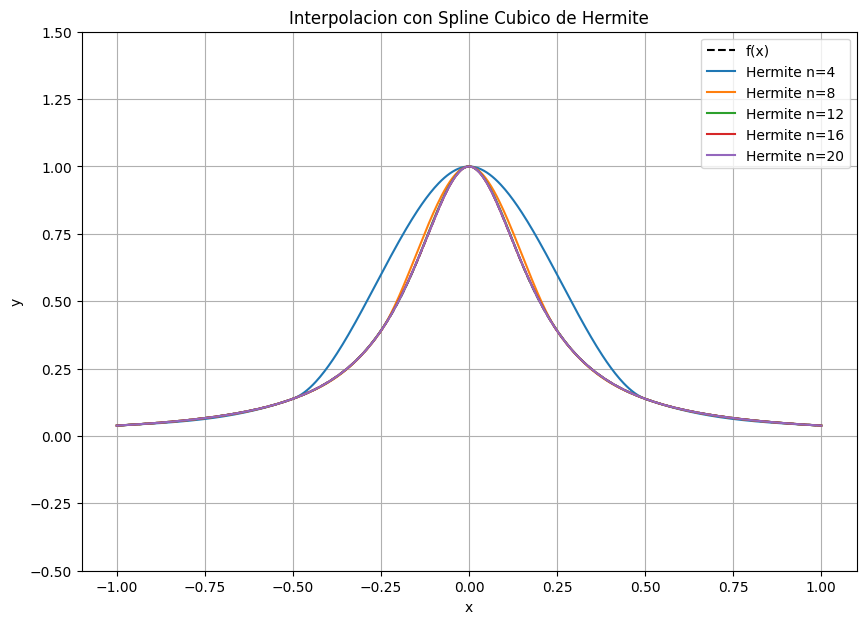


--- 4. Graficando Splines Cubicos Naturales ---


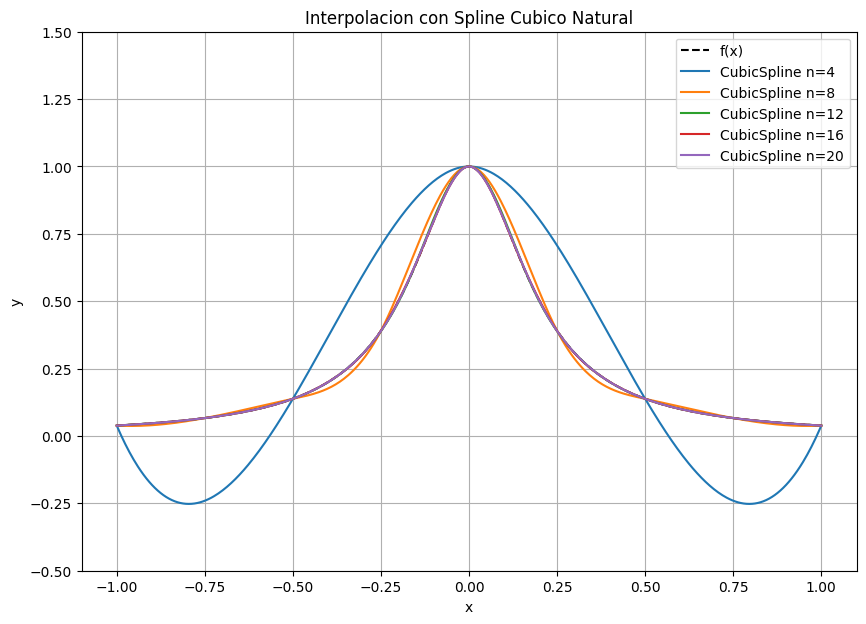


Conclusion:
1. Interpolacion de Lagrange: Como se observa en la primera grafica, a medida que aumenta el numero de puntos 'n',
   las oscilaciones en los extremos del intervalo [-1, 1] se vuelven cada vez mas grandes. Este es el
   conocido fenomeno de Runge, que demuestra que usar mas puntos equiespaciados con un unico polinomio
   de alto grado no garantiza una mejor aproximacion.

2. Interpolacion con Splines (Hermite y Natural): Las ultimas dos graficas muestran que tanto los splines
   cubicos de Hermite como los naturales son excelentes para aproximar la funcion de Runge. Las curvas
   son suaves y no presentan las oscilaciones problematicas de Lagrange, incluso con un numero alto
   de puntos. Esto se debe a que los splines son funciones definidas por tramos de polinomios de bajo
   grado (cubicos), lo que los hace mucho mas estables.



In [32]:
# --- Configuracion Inicial ---

# se define la funcion de Runge, famosa por causar problemas en la interpolacion polinomial
funcion_runge = lambda x: 1 / (1 + 25*x**2)

# se define una lista con los diferentes numeros de puntos (n+1) que se usaran
valores_n = [4, 8, 12, 16, 20]

# se crea un conjunto de puntos x denso para graficar las funciones de forma suave
x_grafica = np.linspace(-1, 1, 500)

# --- Inciso 1: Graficas de Lagrange y su Error (separadas por cada n) ---
print("--- 1. Graficando Polinomios de Lagrange y su Error para cada n ---")

# se define una funcion para calcular el error real absoluto
error_real_absoluto = lambda y_real, y_aprox: np.abs(y_real - y_aprox)

# se itera sobre los diferentes valores de n para crear una figura para cada caso
for n_actual in valores_n:
    # se crea una nueva figura con dos subplots (uno al lado del otro)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Interpolacion de Lagrange con n = {n_actual}', fontsize=16)

    # --- Subplot Izquierdo: Interpolacion vs Funcion Real ---

    # se generan n+1 puntos equiespaciados en el intervalo [-1, 1]
    nodos_x = np.linspace(-1, 1, n_actual + 1)
    nodos_y = funcion_runge(nodos_x)

    # se calcula el polinomio de Lagrange
    polinomio_lagrange = lagrange(nodos_x, nodos_y)
    y_grafica_lagrange = polinomio_lagrange(x_grafica)

    # se grafica la funcion original, los puntos y el polinomio
    ax1.plot(x_grafica, funcion_runge(x_grafica), label='f(x) (Runge)', color='black')
    ax1.plot(x_grafica, y_grafica_lagrange, label=f'Polinomio P(x)', color='blue')
    ax1.scatter(nodos_x, nodos_y, color='red', zorder=5, label='Nodos de Interpolacion')

    ax1.set_title('Aproximacion Polinomial')
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.grid(True)
    ax1.legend()
    ax1.set_ylim(-0.5, 1.5) # se fija el eje y para facilitar la comparacion entre graficas

    # --- Subplot Derecho: Grafica del Error ---

    # se calcula el error real absoluto para la grafica
    error_puntos = error_real_absoluto(funcion_runge(x_grafica), y_grafica_lagrange)

    # se grafica el error
    ax2.plot(x_grafica, error_puntos, label=f'Error |f(x) - P(x)|', color='red')

    ax2.set_title('Error de Interpolacion')
    ax2.set_xlabel("x")
    ax2.set_ylabel("Error Absoluto")
    ax2.grid(True)
    ax2.legend()
    ax2.set_ylim(bottom=0) # el error absoluto siempre es >= 0

    # se muestra la figura para el n actual
    plt.tight_layout()
    plt.show()


# --- Inciso 2: Estimacion de la Cota del Error ---
print("\n--- 2. Estimando la Cota de Error para Lagrange (n=4 en x=0.5) ---")

x_simbolico = sp.Symbol('x')
f_simbolica = 1 / (1 + 25 * x_simbolico**2)

derivada_5_simbolica = sp.diff(f_simbolica, x_simbolico, 5)
valor_derivada_estimado = abs(derivada_5_simbolica.subs(x_simbolico, 0.5))

nodos_x_n4 = np.linspace(-1, 1, 5)
termino_productoria = np.prod([0.5 - xi for xi in nodos_x_n4])
cota_error_estimada = valor_derivada_estimado * abs(termino_productoria) / factorial(5)

print(f'La cota de error estimada en x=0.5 para n=4 es: {cota_error_estimada:.6f}')


# --- Inciso 3: Interpolacion con Spline de Hermite ---
print("\n--- 3. Graficando Splines Cubicos de Hermite ---")

derivada_f = lambda x: -50*x / (1 + 25*x**2)**2

plt.figure(figsize=(10, 7))
plt.plot(x_grafica, funcion_runge(x_grafica), 'k--', label='f(x)')

for n_actual in valores_n:
    nodos_x = np.linspace(-1, 1, n_actual + 1)
    nodos_y = funcion_runge(nodos_x)
    valores_dy = derivada_f(nodos_x)
    spline_hermite = CubicHermiteSpline(nodos_x, nodos_y, valores_dy)
    plt.plot(x_grafica, spline_hermite(x_grafica), label=f'Hermite n={n_actual}')

plt.title("Interpolacion con Spline Cubico de Hermite")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

# --- Inciso 4: Interpolacion con Spline Cubico Natural ---
print("\n--- 4. Graficando Splines Cubicos Naturales ---")

plt.figure(figsize=(10, 7))
plt.plot(x_grafica, funcion_runge(x_grafica), 'k--', label='f(x)')

for n_actual in valores_n:
    nodos_x = np.linspace(-1, 1, n_actual + 1)
    nodos_y = funcion_runge(nodos_x)
    spline_cubico = CubicSpline(nodos_x, nodos_y)
    plt.plot(x_grafica, spline_cubico(x_grafica), label=f'CubicSpline n={n_actual}')

plt.title("Interpolacion con Spline Cubico Natural")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

# --- Conclusion Final ---
print("""
Conclusion:
1. Interpolacion de Lagrange: Como se observa en la primera grafica, a medida que aumenta el numero de puntos 'n',
   las oscilaciones en los extremos del intervalo [-1, 1] se vuelven cada vez mas grandes. Este es el
   conocido fenomeno de Runge, que demuestra que usar mas puntos equiespaciados con un unico polinomio
   de alto grado no garantiza una mejor aproximacion.

2. Interpolacion con Splines (Hermite y Natural): Las ultimas dos graficas muestran que tanto los splines
   cubicos de Hermite como los naturales son excelentes para aproximar la funcion de Runge. Las curvas
   son suaves y no presentan las oscilaciones problematicas de Lagrange, incluso con un numero alto
   de puntos. Esto se debe a que los splines son funciones definidas por tramos de polinomios de bajo
   grado (cubicos), lo que los hace mucho mas estables.
""")

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

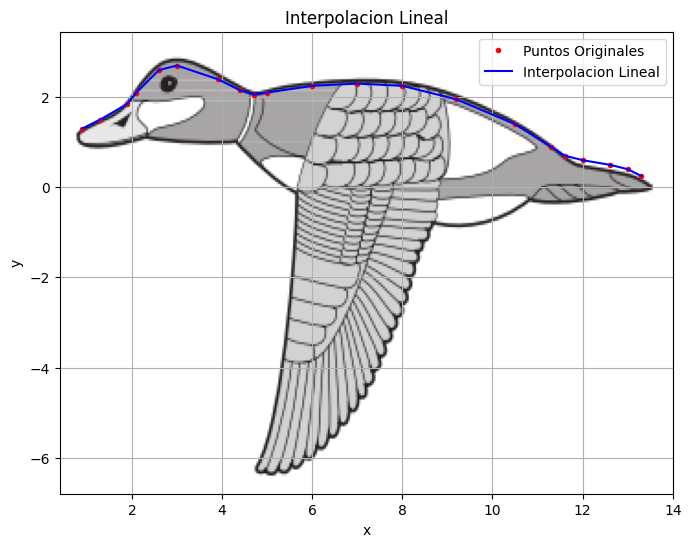

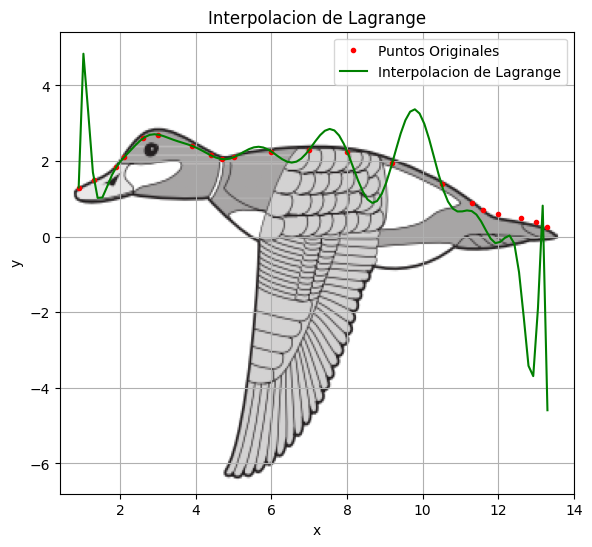

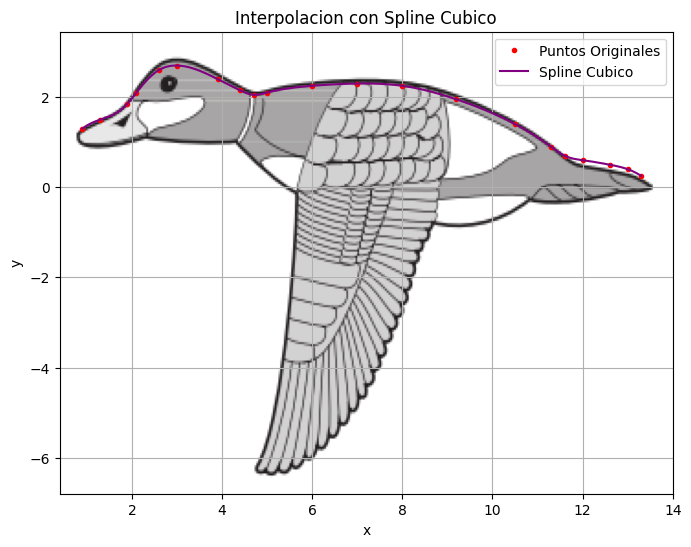

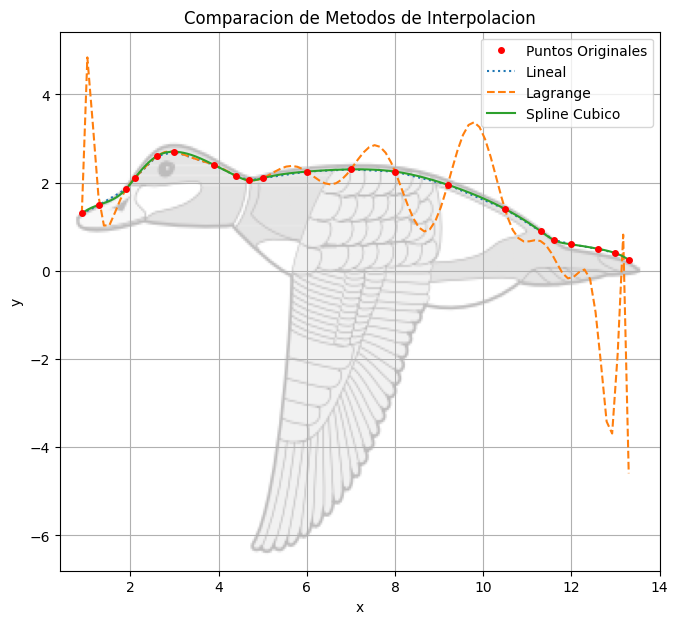

In [34]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Definimos un conjunto denso de puntos x para graficar las interpolaciones de forma suave
puntos_x_suaves = np.linspace(min(xp), max(xp), 500)
puntos_x_suaves_lagrange = np.linspace(min(xp), max(xp), 100)

# --- Calculo de las Interpolaciones ---

# Interpolacion Lineal
interpolador_lineal = interp1d(xp, yp)
puntos_y_lineal = interpolador_lineal(puntos_x_suaves)

# Polinomio de interpolacion de Lagrange
polinomio_lagrange = lagrange(xp, yp)
puntos_y_lagrange = polinomio_lagrange(puntos_x_suaves_lagrange)

# Interpolacion mediante splines cubicos
spline_cubico = CubicSpline(xp, yp)
puntos_y_spline_cubico = spline_cubico(puntos_x_suaves)


# --- Graficas Separadas por Metodo ---

# Grafica 1: Interpolacion Lineal
plt.figure(figsize=(10,6))
plt.title('Interpolacion Lineal')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos Originales')
plt.plot(puntos_x_suaves, puntos_y_lineal, '-', color='blue', label='Interpolacion Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Grafica 2: Interpolacion de Lagrange
plt.figure(figsize=(10,6))
plt.title('Interpolacion de Lagrange')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos Originales')
plt.plot(puntos_x_suaves_lagrange, puntos_y_lagrange, '-', color='green', label='Interpolacion de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Grafica 3: Spline Cubico
plt.figure(figsize=(10,6))
plt.title('Interpolacion con Spline Cubico')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos Originales')
plt.plot(puntos_x_suaves, puntos_y_spline_cubico, '-', color='purple', label='Spline Cubico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


# --- Grafica General Comparativa ---
plt.figure(figsize=(12,7))
plt.title('Comparacion de Metodos de Interpolacion')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45), alpha=0.3)
plt.plot(xp, yp, '.r', markersize=8, label='Puntos Originales', zorder=5)

# Se grafican todas las curvas juntas
plt.plot(puntos_x_suaves, puntos_y_lineal, label='Lineal', linestyle=':')
plt.plot(puntos_x_suaves_lagrange, puntos_y_lagrange, label='Lagrange', linestyle='--')
plt.plot(puntos_x_suaves, puntos_y_spline_cubico, label='Spline Cubico')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [30]:
# --- 1. Datos Iniciales y Preparacion ---

# se definen los puntos de interpolacion
puntos_x = np.array([-1, 0, 1, 2], dtype=float)
puntos_y = np.array([5, 3, 3, 4], dtype=float)

# numero de puntos
n = len(puntos_x)

# se calculan los anchos de los intervalos (h_i = x_{i+1} - x_i)
# np.diff calcula la diferencia entre elementos consecutivos de un array
anchos_h = np.diff(puntos_x)

# --- 2. Construccion y Solucion del Sistema Matricial ---
# La explicacion de como se construye el spline de manera manual se obtuvo de Gemini 2.5 pro
# Para un spline cubico natural, la segunda derivada en los extremos es cero (m_0=0, m_n=0).
# Se debe resolver un sistema de ecuaciones lineales para las segundas derivadas
# en los puntos interiores (m_1, m_2, ..., m_{n-1}).

# se inicializa la matriz A (tridiagonal) y el vector b del sistema Am=b
# El tamaño es (n-2)x(n-2) porque solo resolvemos para los puntos interiores.
num_ecuaciones = n - 2
matriz_A = np.zeros((num_ecuaciones, num_ecuaciones))
vector_b = np.zeros(num_ecuaciones)

# se llena la matriz A y el vector b
for i in range(num_ecuaciones):
    # La variable i del bucle corresponde al indice i=1, 2, ... del sistema de ecuaciones
    idx = i + 1

    # se llena la diagonal principal
    matriz_A[i, i] = 2 * (anchos_h[idx - 1] + anchos_h[idx])

    # se llenan las diagonales superior e inferior
    if i > 0:
        matriz_A[i, i - 1] = anchos_h[idx - 1]
    if i < num_ecuaciones - 1:
        matriz_A[i, i + 1] = anchos_h[idx]

    # se llena el vector b
    termino1 = (puntos_y[idx + 1] - puntos_y[idx]) / anchos_h[idx]
    termino2 = (puntos_y[idx] - puntos_y[idx - 1]) / anchos_h[idx - 1]
    vector_b[i] = 6 * (termino1 - termino2)

# se resuelve el sistema Am=b para encontrar las segundas derivadas interiores
# np.linalg.solve es la funcion de numpy para resolver sistemas de ecuaciones lineales
derivadas_segundas_interiores = np.linalg.solve(matriz_A, vector_b)

# se reconstruye el vector completo de segundas derivadas, anadiendo los ceros de los extremos
derivadas_segundas_m = np.concatenate(([0], derivadas_segundas_interiores, [0]))

print("--- Calculo Manual (Programado) ---")
print(f"Matriz A del sistema:\n{matriz_A}")
print(f"Vector b del sistema:\n{vector_b}")
print(f"Vector de segundas derivadas m = {np.round(derivadas_segundas_m, 4)}")

# --- 3. Calculo de los Coeficientes de los Polinomios ---
# S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3

# se calculan los coeficientes para cada tramo del spline
coeficientes_a = puntos_y[:-1]
coeficientes_c = derivadas_segundas_m[:-1] / 2
coeficientes_d = np.diff(derivadas_segundas_m) / (6 * anchos_h)
coeficientes_b = (np.diff(puntos_y) / anchos_h) - (anchos_h / 6) * (2 * derivadas_segundas_m[:-1] + derivadas_segundas_m[1:])

# se muestran los polinomios resultantes (S0, S1, S2)
print("\nPolinomios del Spline Cubico S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3:")
for i in range(n - 1):
    # se obtiene el signo para una impresion mas clara
    signo_c = '+' if coeficientes_c[i] >= 0 else '-'
    signo_d = '+' if coeficientes_d[i] >= 0 else '-'
    print(f"S_{i}(x) = {coeficientes_a[i]:.3f} + {coeficientes_b[i]:.3f}(x - {puntos_x[i]}) {signo_c} {abs(coeficientes_c[i]):.3f}(x - {puntos_x[i]})^2 {signo_d} {abs(coeficientes_d[i]):.3f}(x - {puntos_x[i]})^3,  para x en [{puntos_x[i]}, {puntos_x[i+1]}]")

# --- 4. Funcion para Evaluar el Spline ---
def evaluador_spline_manual(x_eval):
    """
    Evalua el spline cubico calculado manualmente en un punto x_eval.
    """
    # se determina en que intervalo se encuentra el punto a evaluar
    # np.searchsorted encuentra el indice donde el elemento deberia ser insertado para mantener el orden
    # si x_eval esta en [x_i, x_{i+1}], el indice devuelto es i+1. Por eso restamos 1.
    i = np.searchsorted(puntos_x, x_eval) - 1

    # nos aseguramos de no salirnos de los limites del array de coeficientes
    i = max(0, min(i, n-2))

    # se evalua el polinomio correspondiente a ese intervalo
    dx = x_eval - puntos_x[i]
    valor_evaluado = coeficientes_a[i] + coeficientes_b[i]*dx + coeficientes_c[i]*dx**2 + coeficientes_d[i]*dx**3
    return valor_evaluado

# --- 5. Evaluacion y Verificacion ---
punto_a_evaluar = 1.5

# a) Evaluacion usando nuestra implementacion
valor_manual = evaluador_spline_manual(punto_a_evaluar)
print(f"\nEvaluacion para x = {punto_a_evaluar}:")
print(f"Resultado del spline manual: {valor_manual:.4f}")

# b) Verificacion usando la libreria scipy
# se crea el spline cubico natural con la funcion de scipy
spline_scipy = CubicSpline(puntos_x, puntos_y, bc_type='natural')
# se evalua el spline de scipy en el mismo punto
valor_scipy = spline_scipy(punto_a_evaluar)
print(f"Resultado usando scipy.CubicSpline: {valor_scipy:.4f}")

# c) Comparacion final
# se comprueba si ambos resultados son numericamente cercanos
if np.isclose(valor_manual, valor_scipy):
    print("\n✅ Verificacion exitosa: Ambos resultados coinciden.")
else:
    print("\n❌ Error: Los resultados no coinciden.")

--- Calculo Manual (Programado) ---
Matriz A del sistema:
[[4. 1.]
 [1. 4.]]
Vector b del sistema:
[12.  6.]
Vector de segundas derivadas m = [0.  2.8 0.8 0. ]

Polinomios del Spline Cubico S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3:
S_0(x) = 5.000 + -2.467(x - -1.0) + 0.000(x - -1.0)^2 + 0.467(x - -1.0)^3,  para x en [-1.0, 0.0]
S_1(x) = 3.000 + -1.067(x - 0.0) + 1.400(x - 0.0)^2 - 0.333(x - 0.0)^3,  para x en [0.0, 1.0]
S_2(x) = 3.000 + 0.733(x - 1.0) + 0.400(x - 1.0)^2 - 0.133(x - 1.0)^3,  para x en [1.0, 2.0]

Evaluacion para x = 1.5:
Resultado del spline manual: 3.4500
Resultado usando scipy.CubicSpline: 3.4500

✅ Verificacion exitosa: Ambos resultados coinciden.
